In [1]:
import pandas as pd
import torch
import os
import sys
from torch.utils.data import DataLoader
import time
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from dataset_TEP import dataset_TEP

In [2]:
dataset = dataset_TEP()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def plot_accuracies(results, stepsize, labels_name):
    res=results
    fig=plt.figure(figsize=(10, 6))
    ax=plt.subplot(polar=True)
    
    ax.set_ylim(0.4,1)
    ax.set_yticks(np.arange(0.5,1,0.1))
    
    simulationGroup_tests=[1, 2, 3, 4, 5]
    angles=[i*360/len(simulationGroup_tests) for i in range(len(simulationGroup_tests))]
    lines, labels = plt.thetagrids(angles, (simulationGroup_tests))
    for i in res:
        i.append(i[0]) 
        theta = np.linspace(0, 2 * np.pi, len(i))
        plt.plot(theta, i)

    #plt.fill(theta, actual, 'b', alpha=0.1)
    plt.legend(labels=labels_name, bbox_to_anchor=(0.5, -0.25), loc=8)
    
    plt.title("Step = "+str(stepsize))
    plt.show(fig)
    fig.savefig("All_Faults_Step_"+str(stepsize)+".png")
    plt.close(fig) 

# Apprentissage

In [4]:
import models
import importlib
importlib.reload(models)
import pytorch_lightning as pl 
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [5]:
def train_model(model, clipping, num_epochs, data_loader_train, data_loader_val, data_loader_test):

    early_stop_callback = EarlyStopping(
      monitor='valid_accuracy',
      min_delta=0.00,
      patience=15,
      verbose=False,
      mode='max'
    )
    trainer = Trainer(max_epochs=num_epochs, gradient_clip_val= clipping, progress_bar_refresh_rate = 40, gpus=0, callbacks=[early_stop_callback])
    trainer.fit(model, data_loader_train, data_loader_val)
    final_results = trainer.logged_metrics
    final_results["test"] = trainer.test(model, data_loader_test)[0]
    final_results["num_epochs"] = trainer.current_epoch
    final_results["num_parameters"] = model.num_paramaters
    return final_results

# Comparaison des modeles

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.5 K
4 | classifier | Sequential | 132 K 
------------------------------------------
148 K     Trainable params
0         Non-trainable params
148 K     Total params
0.595     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 105 K 
------------------------------------------
105 K     Trainable params
0         Non-trainable params
105 K     Total params
0.420     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 1.0,
 'test_accuracy_epoch': 1.0,
 'test_batch_time': 0.007253408432006836,
 'test_batch_time_epoch': 0.008134710602462292,
 'test_loss': 0.00010271805513184518,
 'test_loss_epoch': 5.147487172507681e-05}
--------------------------------------------------------------------------------
Base stepsize :  500  simulationGroup_test :  1  Test Accuracy :  1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 102 K 
------------------------------------------
102 K     Trainable params
0         Non-trainable params
102 K     Total params
0.412     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9900000095367432,
 'test_accuracy_epoch': 0.9900000095367432,
 'test_batch_time': 0.008736848831176758,
 'test_batch_time_epoch': 0.01046303752809763,
 'test_loss': 0.03260427340865135,
 'test_loss_epoch': 0.04530087485909462}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  500  simulationGroup_tests :  1  Test Accuracy :  0.9900000095367432


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9279999732971191,
 'test_accuracy_epoch': 0.9279999732971191,
 'test_batch_time': 0.0062487125396728516,
 'test_batch_time_epoch': 0.0083587896078825,
 'test_loss': 0.5786464810371399,
 'test_loss_epoch': 0.5957530736923218}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  500  simulationGroup_tests :  1  Test Accuracy :  0.9279999732971191


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.5 K
4 | classifier | Sequential | 132 K 
------------------------------------------
148 K     Trainable params
0         Non-trainable params
148 K     Total params
0.595     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 105 K 
------------------------------------------
105 K     Trainable params
0         Non-trainable params
105 K     Total params
0.420     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 1.0,
 'test_accuracy_epoch': 1.0,
 'test_batch_time': 0.00814676284790039,
 'test_batch_time_epoch': 0.006559917237609625,
 'test_loss': 0.0006738344673067331,
 'test_loss_epoch': 0.0006651735166087747}
--------------------------------------------------------------------------------
Base stepsize :  500  simulationGroup_test :  2  Test Accuracy :  1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 102 K 
------------------------------------------
102 K     Trainable params
0         Non-trainable params
102 K     Total params
0.412     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7559999823570251,
 'test_accuracy_epoch': 0.7559999823570251,
 'test_batch_time': 0.008417367935180664,
 'test_batch_time_epoch': 0.008985605090856552,
 'test_loss': 0.2851249575614929,
 'test_loss_epoch': 0.6061833500862122}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  500  simulationGroup_tests :  2  Test Accuracy :  0.7559999823570251


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7020000219345093,
 'test_accuracy_epoch': 0.7020000219345093,
 'test_batch_time': 0.005978584289550781,
 'test_batch_time_epoch': 0.0075582582503557205,
 'test_loss': 0.6701980233192444,
 'test_loss_epoch': 0.6899530291557312}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  500  simulationGroup_tests :  2  Test Accuracy :  0.7020000219345093


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.5 K
4 | classifier | Sequential | 132 K 
------------------------------------------
148 K     Trainable params
0         Non-trainable params
148 K     Total params
0.595     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 105 K 
------------------------------------------
105 K     Trainable params
0         Non-trainable params
105 K     Total params
0.420     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 1.0,
 'test_accuracy_epoch': 1.0,
 'test_batch_time': 0.02526092529296875,
 'test_batch_time_epoch': 0.007176551967859268,
 'test_loss': 2.38418056142109e-06,
 'test_loss_epoch': 7.54636175770429e-06}
--------------------------------------------------------------------------------
Base stepsize :  500  simulationGroup_test :  3  Test Accuracy :  1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 102 K 
------------------------------------------
102 K     Trainable params
0         Non-trainable params
102 K     Total params
0.412     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 1.0,
 'test_accuracy_epoch': 1.0,
 'test_batch_time': 0.00809478759765625,
 'test_batch_time_epoch': 0.009444968774914742,
 'test_loss': 0.00035183303407393396,
 'test_loss_epoch': 0.0008418495999649167}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  500  simulationGroup_tests :  3  Test Accuracy :  1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9940000176429749,
 'test_accuracy_epoch': 0.9940000176429749,
 'test_batch_time': 0.006127834320068359,
 'test_batch_time_epoch': 0.00984936859458685,
 'test_loss': 0.21690931916236877,
 'test_loss_epoch': 0.19121645390987396}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  500  simulationGroup_tests :  3  Test Accuracy :  0.9940000176429749


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.5 K
4 | classifier | Sequential | 132 K 
------------------------------------------
148 K     Trainable params
0         Non-trainable params
148 K     Total params
0.595     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 105 K 
------------------------------------------
105 K     Trainable params
0         Non-trainable params
105 K     Total params
0.420     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 1.0,
 'test_accuracy_epoch': 1.0,
 'test_batch_time': 0.007074117660522461,
 'test_batch_time_epoch': 0.006611173506826162,
 'test_loss': 8.016782885533758e-06,
 'test_loss_epoch': 8.633527613710612e-06}
--------------------------------------------------------------------------------
Base stepsize :  500  simulationGroup_test :  4  Test Accuracy :  1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 102 K 
------------------------------------------
102 K     Trainable params
0         Non-trainable params
102 K     Total params
0.412     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 1.0,
 'test_accuracy_epoch': 1.0,
 'test_batch_time': 0.007970809936523438,
 'test_batch_time_epoch': 0.010150367394089699,
 'test_loss': 0.000869571347720921,
 'test_loss_epoch': 0.001114655053243041}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  500  simulationGroup_tests :  4  Test Accuracy :  1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9959999918937683,
 'test_accuracy_epoch': 0.9959999918937683,
 'test_batch_time': 0.006574869155883789,
 'test_batch_time_epoch': 0.008426294662058353,
 'test_loss': 0.24313300848007202,
 'test_loss_epoch': 0.18369825184345245}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  500  simulationGroup_tests :  4  Test Accuracy :  0.9959999918937683


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.5 K
4 | classifier | Sequential | 132 K 
------------------------------------------
148 K     Trainable params
0         Non-trainable params
148 K     Total params
0.595     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 105 K 
------------------------------------------
105 K     Trainable params
0         Non-trainable params
105 K     Total params
0.420     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 1.0,
 'test_accuracy_epoch': 1.0,
 'test_batch_time': 0.007630348205566406,
 'test_batch_time_epoch': 0.00765181751921773,
 'test_loss': 4.351124971435638e-06,
 'test_loss_epoch': 1.0490282875252888e-05}
--------------------------------------------------------------------------------
Base stepsize :  500  simulationGroup_test :  5  Test Accuracy :  1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | classifier | Sequential | 102 K 
------------------------------------------
102 K     Trainable params
0         Non-trainable params
102 K     Total params
0.412     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9900000095367432,
 'test_accuracy_epoch': 0.9900000095367432,
 'test_batch_time': 0.008466958999633789,
 'test_batch_time_epoch': 0.011587373912334442,
 'test_loss': 0.012228882871568203,
 'test_loss_epoch': 0.047660887241363525}
--------------------------------------------------------------------------------
MultiChannel MultiTime stepsize :  500  simulationGroup_tests :  5  Test Accuracy :  0.9900000095367432


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9419999718666077,
 'test_accuracy_epoch': 0.9419999718666077,
 'test_batch_time': 0.006266593933105469,
 'test_batch_time_epoch': 0.007691055070608854,
 'test_loss': 0.5710132718086243,
 'test_loss_epoch': 0.46940141916275024}
--------------------------------------------------------------------------------
MultiChannel MultiTime DownSample stepsize :  500  simulationGroup_tests :  5  Test Accuracy :  0.9419999718666077
[[1.0, 1.0, 1.0, 1.0, 1.0], [0.9900000095367432, 0.7559999823570251, 1.0, 1.0, 0.9900000095367432], [0.9279999732971191, 0.7020000219345093, 0.9940000176429749, 0.9959999918937683, 0.9419999718666077]]


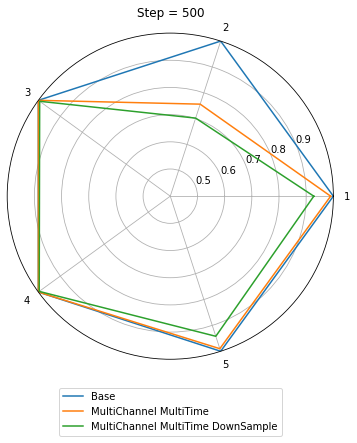

In [7]:
fault_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
batch_sizes = {500:16} #{8:256,16:128,32:64,64:32,128:16}

simulationGroup_tests = [1,2,3,4,5]
stepsizes=[500]
window_size=500
n_features = 52
results=[[],[],[]]
for stepsize in stepsizes:
    for simulationGroup_test in simulationGroup_tests:
        train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(fault_list, simulationGroup_test, window_size, stepsize, batch_sizes[stepsize])

        #modèle de Base
        model1 = models.MultiChannelBase(n_features, [3,3], window_size, len(fault_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model1, 1, 50, train_data, test_data, test_data)
        print("Base stepsize : ", stepsize,
              " simulationGroup_test : ", simulationGroup_test,
              " Test Accuracy : ", res['test']['test_accuracy'])
        results[0].append(res['test']['test_accuracy'])
        del model1
        torch.cuda.empty_cache()
        
        #modèle MultiChannel MultiTime
        window_sizes=[256,128,64]
        kernel_sizes=[[3,3,3],[3,3],[3]]
        model2 = models.MultiChannelMultiTime(n_features, window_sizes, kernel_sizes, len(fault_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model2, 1, 50, train_data, test_data, test_data)
        print("MultiChannel MultiTime stepsize : ",stepsize," simulationGroup_tests : ",simulationGroup_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[1].append(res['test']['test_accuracy'])
        del model2
        torch.cuda.empty_cache()
        
        #modèle MultiChannel MultiTime DownSample
        window_sizes=[256,128,64]
        kernel_sizes=[3]
        down_sampling_kernel=[[3,3],[3],[]]
        model3 = models.MultiChannelMultiTimeDownSample(n_features, window_sizes, down_sampling_kernel, kernel_sizes, 64, len(fault_list), lr = 0.0001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model3, 1, 50, train_data, test_data, test_data)
        print("MultiChannel MultiTime DownSample stepsize : ",stepsize," simulationGroup_tests : ",simulationGroup_test," Test Accuracy : ",res['test']['test_accuracy'])
        results[2].append(res['test']['test_accuracy'])
        del model3
        torch.cuda.empty_cache()

    print(results)
    plot_accuracies(results, stepsize, ["Base", "MultiChannel MultiTime", "MultiChannel MultiTime DownSample"])
    results=[[],[],[]]